# Computer Vision

## Import the necessary Library

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import tensorflow as tf
tf.__version__
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from scipy import stats

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from keras.preprocessing.image import ImageDataGenerator
import cv2
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
sns.set(color_codes=True)

# Part 1 

## Load the data

In [2]:
labels = ['Black-grass', 'Charlock','Cleavers','Common Chickweed','Common Wheat','Fat Hen','Loose Silky-bent','Maize','Scentless Mayweed','Shepherds Purse','Small-flowered Cranesbill','Sugar beet']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE) #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
train = get_data('D:/Dataset/train')

J:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


## Data plotting 

<AxesSubplot:xlabel='count'>

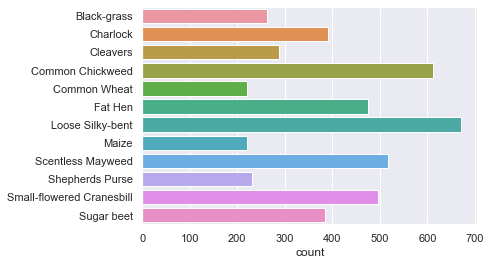

In [4]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Black-grass")
    elif(i[1]==1):
        l.append("Charlock")
    elif(i[1]==2):
        l.append("Cleavers")
    elif(i[1]==3):
        l.append("Common Chickweed")
    elif(i[1]==4):
        l.append("Common Wheat")
    elif(i[1]==5):
        l.append("Fat Hen")
    elif(i[1]==6):
        l.append("Loose Silky-bent")
    elif(i[1]==7):   
        l.append("Maize")
    elif(i[1]==8):
        l.append("Scentless Mayweed")
    elif(i[1]==9):
        l.append("Shepherds Purse")
    elif(i[1]==10):
        l.append("Small-flowered Cranesbill")
    else:
        l.append("Sugar beet")
sns.set_style('darkgrid')
sns.countplot(y=l)

In [5]:
#occurrences = l.count("Cleavers")
#occurrences #(940)

Text(0.5, 1.0, 'Black-grass')

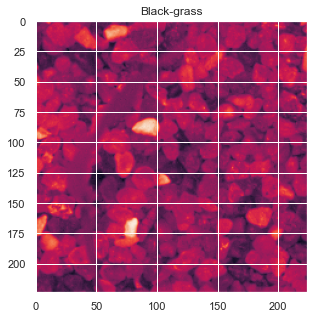

In [6]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'Charlock')

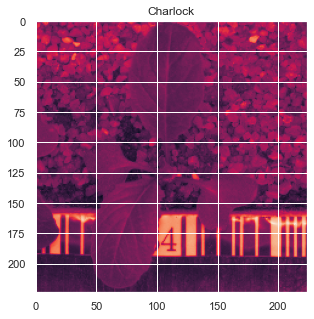

In [7]:
plt.figure(figsize = (5,5))
plt.imshow(train[267][0])
plt.title(labels[train[267][1]])

Text(0.5, 1.0, 'Cleavers')

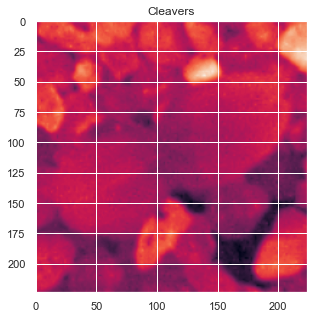

In [8]:
plt.figure(figsize = (5,5))
plt.imshow(train[660][0])
plt.title(labels[train[660][1]])

Text(0.5, 1.0, 'Common Chickweed')

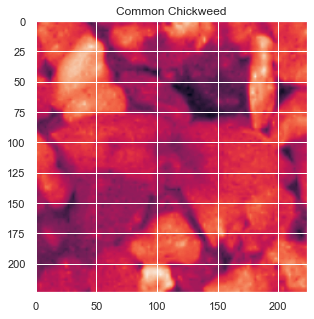

In [9]:
plt.figure(figsize = (5,5))
plt.imshow(train[950][0])
plt.title(labels[train[950][1]])

## Learning

## Splitting label and images

In [152]:
x_train = []
y_train = []
for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

In [153]:
print("Total no of images :",len(x_train))
print("Total no of labels :",len(y_train))

Total no of images : 4767
Total no of labels : 4767


In [154]:
x_train[1]

array([[ 46,  48,  55, ..., 121, 120, 113],
       [ 50,  51,  50, ..., 122, 117, 102],
       [ 49,  51,  55, ..., 107, 100,  95],
       ...,
       [ 55,  56,  58, ...,  83,  82,  79],
       [ 57,  61,  58, ...,  82,  81,  80],
       [ 59,  61,  62, ...,  80,  79,  75]], dtype=uint8)

In [155]:
y_train[1]

0

In [156]:
x_train[4766]

array([[87, 84, 90, ..., 76, 76, 73],
       [84, 92, 87, ..., 80, 78, 67],
       [87, 91, 84, ..., 69, 68, 66],
       ...,
       [72, 71, 74, ..., 89, 76, 53],
       [70, 72, 72, ..., 79, 72, 44],
       [70, 75, 74, ..., 57, 51, 42]], dtype=uint8)

In [157]:
y_train[4766]

11

In [158]:
x_train = np.array(x_train)
y_train= np.array(y_train)

### Resizing images

In [159]:
x_train_resized=np.zeros((x_train.shape[0],50,50))
for i in range(x_train.shape[0]):
  #using cv2.resize to resize each train example to 28X28 size using Cubic interpolation
  x_train_resized[i,:,:]=cv2.resize(x_train[i],dsize=(50,50),interpolation=cv2.INTER_CUBIC)
x_train = x_train_resized.reshape(x_train_resized.shape[0], 50, 50, 1)
x_train = x_train/ 255

In [160]:
print("Shape of data :",x_train.shape)
print("Shape of labels :",y_train.shape)

Shape of data : (4767, 50, 50, 1)
Shape of labels : (4767,)


#### Train and test split

In [161]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.30, random_state=1)

### Data augmentation

In [162]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)


In [163]:
val_gen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)

val_gen.fit(X_test)

### NN

In [164]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(input_shape=(12,)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(12, activation='softmax')
])


In [165]:
model1.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [166]:
history1=model1.fit(datagen.flow(X_train, y_train, batch_size=64),validation_data=(X_test,y_test),epochs=30,verbose=1)



Train for 53 steps, validate on 1431 samples
Epoch 1/30
53/53 [==============================] - 3s 52ms/step - loss: 2.4961 - accuracy: 0.1346 - val_loss: 2.5009 - val_accuracy: 0.0853
Epoch 2/30
53/53 [==============================] - 2s 38ms/step - loss: 2.4148 - accuracy: 0.1490 - val_loss: 2.4541 - val_accuracy: 0.1244
Epoch 3/30
53/53 [==============================] - 2s 39ms/step - loss: 2.3733 - accuracy: 0.1556 - val_loss: 2.4466 - val_accuracy: 0.1293
Epoch 4/30
53/53 [==============================] - 2s 38ms/step - loss: 2.3424 - accuracy: 0.1676 - val_loss: 2.4248 - val_accuracy: 0.1342
Epoch 5/30
53/53 [==============================] - 2s 38ms/step - loss: 2.3399 - accuracy: 0.1691 - val_loss: 2.4071 - val_accuracy: 0.1502
Epoch 6/30
53/53 [==============================] - 2s 40ms/step - loss: 2.3356 - accuracy: 0.1667 - val_loss: 2.3615 - val_accuracy: 0.1908
Epoch 7/30
53/53 [==============================] - 2s 40ms/step - loss: 2.3109 - accuracy: 0.1844 - val_loss

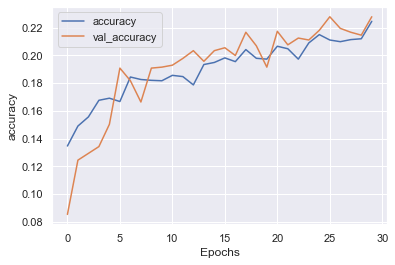

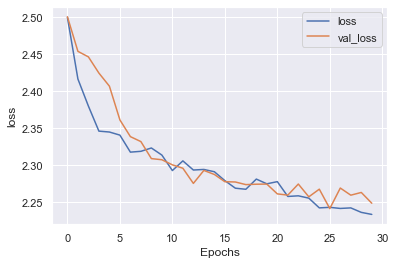

In [168]:
import matplotlib.pyplot as plt


def plot_graphs(history1, string):
  plt.plot(history1.history[string])
  plt.plot(history1.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history1, 'acc')
plot_graphs(history1, 'loss')

### CNN

In [169]:
model2 = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(50, 50, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #tf.keras.layers.BatchNormalization(),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    # 512 neuron hidden layer
    #tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation='softmax')
])

In [170]:
model2.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [171]:
model2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 2, 2, 128)       

In [172]:
history2=model2.fit(datagen.flow(X_train, y_train, batch_size=64),validation_data=(X_test,y_test),epochs=80,verbose=1)


  ...
    to  
  ['...']
Train for 53 steps, validate on 1431 samples
Epoch 1/80
53/53 [==============================] - 8s 156ms/step - loss: 2.4372 - accuracy: 0.1298 - val_loss: 2.4179 - val_accuracy: 0.1398
Epoch 2/80
53/53 [==============================] - 8s 142ms/step - loss: 2.4183 - accuracy: 0.1412 - val_loss: 2.4185 - val_accuracy: 0.1398
Epoch 3/80
53/53 [==============================] - 8s 143ms/step - loss: 2.4150 - accuracy: 0.1412 - val_loss: 2.4240 - val_accuracy: 0.1398
Epoch 4/80
53/53 [==============================] - 8s 145ms/step - loss: 2.4183 - accuracy: 0.1412 - val_loss: 2.4144 - val_accuracy: 0.1398
Epoch 5/80
53/53 [==============================] - 8s 142ms/step - loss: 2.4128 - accuracy: 0.1412 - val_loss: 2.4117 - val_accuracy: 0.1398
Epoch 6/80
53/53 [==============================] - 8s 143ms/step - loss: 2.3950 - accuracy: 0.1550 - val_loss: 2.3662 - val_accuracy: 0.1649
Epoch 7/80
53/53 [==============================] - 8s 142ms/step - loss: 2.35

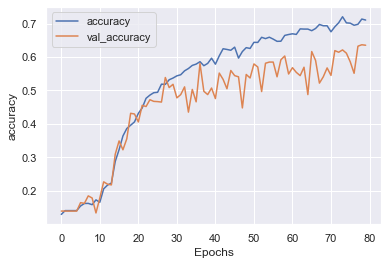

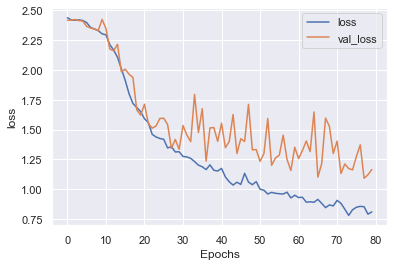

In [173]:
import matplotlib.pyplot as plt


def plot_graphs(history2, string):
  plt.plot(history2.history[string])
  plt.plot(history2.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history2, 'acc')
plot_graphs(history2, 'loss')

### Saving the model

In [174]:
model2.save("CNN_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: CNN_model\assets


### Supervised Learning : Naive Bayes

In [175]:
X_train=X_train.reshape(len(X_train),X_train.shape[1]*X_train.shape[2])
X_test=X_test.reshape(len(X_test),X_test.shape[1]*X_test.shape[2])
y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)

In [176]:
print("Shape of data :",X_train.shape)
print("Shape of labels :",y_train.shape)

Shape of data : (3336, 2500)
Shape of labels : (3336, 1)


In [191]:
gaus_model = GaussianNB()
gaus_model.fit(X_train, y_train)

# Predicting for test set
gaus_predicted = logreg_model.predict(X_test)
gaus_score = logreg_model.score(X_test, y_test)
gaus_accuracy = accuracy_score(y_test, logreg_y_predicted)
gaus_confusion_matrix = metrics.confusion_matrix(y_test, logreg_y_predicted)

J:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [192]:
print('Gaussian Model Accuracy Score  : %f'  % gaus_accuracy)

Gaussian Model Accuracy Score  : 0.149546


### Of all the three CNN had the highest accuracy, using it on test image

In [179]:
test_image = cv2.imread("predict.png",cv2.IMREAD_GRAYSCALE)

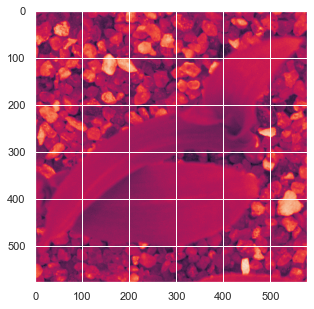

In [180]:
plt.figure(figsize = (5,5))
plt.imshow(test_image)

In [181]:
test_image=cv2.resize(test_image,dsize=(50,50),interpolation=cv2.INTER_CUBIC)
test_image=test_image.reshape(1,50,50,1)

In [182]:
clas= model2.predict(test_image)

In [183]:
print(clas)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [184]:
print('Tha image is Loose Silky-bent')

Tha image is Loose Silky-bent


# Part 2

The main reason why CNN outperforms NN and supervised learning is beacuase, it takes care of the feature extraction from the images itself. It uses convolutions of image and filters to extract the abstract features. Due to the convolutions, interesting features at any region of the image can be detected using CNN.

# Part 3

## Load the data

In [194]:
pip install tflearn


  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127304 sha256=fc0a4a48eccf32c8d16c3ed51b78dcc06de99363c69e0dc7cefcc95a673fb2c7
  Stored in directory: c:\users\ravi\appdata\local\pip\cache\wheels\b4\7f\53\2cc39cdcd4830aa8c962b88318a6d81b334fa00c9ef35b0923
Successfully built tflearn


In [198]:
import tflearn.datasets.oxflower17 as oxflower17

In [224]:
x,y = oxflower17.load_data()

Label: 7


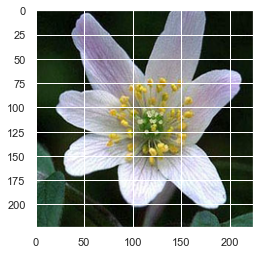

In [229]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y[2]))
plt.imshow(x[2], cmap='gray')

# Plot the data

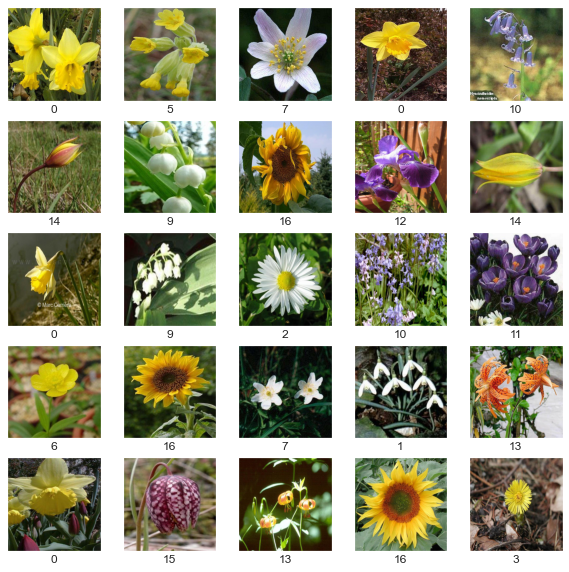

In [230]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10)) # plot 25 images
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i], cmap='gray')
    plt.xlabel(y[i])

## Normalize and split the data

In [231]:
x = x/ 255

In [232]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [233]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(952, 224, 224, 3)
(952,)
(408, 224, 224, 3)
(408,)


## Data Augmentation

In [234]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)


In [235]:
val_gen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)

val_gen.fit(X_test)

## Learning

## NN

In [251]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    #tf.keras.layers.BatchNormalization(input_shape=(16,)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(17, activation='softmax')
])


In [252]:
model1.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [253]:
history1=model1.fit(datagen.flow(X_train, y_train, batch_size=64),validation_data=(X_test,y_test),epochs=30,verbose=1)

Epoch 1/30
15/15 [==============================] - 26s 2s/step - loss: 2.8309 - acc: 0.0526 - val_loss: 2.7844 - val_acc: 0.1078
Epoch 2/30
15/15 [==============================] - 11s 714ms/step - loss: 2.6610 - acc: 0.1271 - val_loss: 2.5056 - val_acc: 0.1814
Epoch 3/30
15/15 [==============================] - 17s 1s/step - loss: 2.4385 - acc: 0.1853 - val_loss: 2.3508 - val_acc: 0.1912
Epoch 4/30
15/15 [==============================] - 17s 1s/step - loss: 2.2818 - acc: 0.1899 - val_loss: 2.1782 - val_acc: 0.2181
Epoch 5/30
15/15 [==============================] - 16s 1s/step - loss: 2.1727 - acc: 0.2002 - val_loss: 2.1492 - val_acc: 0.2279
Epoch 6/30
15/15 [==============================] - 16s 1s/step - loss: 2.0858 - acc: 0.2564 - val_loss: 1.9029 - val_acc: 0.3137
Epoch 7/30
15/15 [==============================] - 16s 1s/step - loss: 2.0159 - acc: 0.2831 - val_loss: 1.9439 - val_acc: 0.2941
Epoch 8/30
15/15 [==============================] - 16s 1s/step - loss: 1.9848 - acc: 0

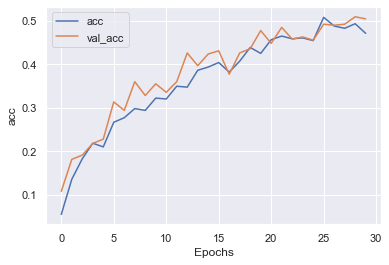

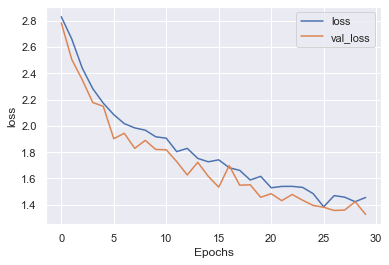

In [261]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history1.history[string])
  plt.plot(history1.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history1, 'acc')
plot_graphs(history1, 'loss')

### CNN

In [262]:
model2 = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #tf.keras.layers.BatchNormalization(),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    # 512 neuron hidden layer
    #tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(17, activation='softmax')
])

In [263]:
model2.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [264]:
model2.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 24, 24, 128)     

In [269]:
history2=model2.fit(datagen.flow(X_train, y_train, batch_size=64),validation_data=(X_test,y_test),epochs=50,verbose=1)

Epoch 1/10
15/15 [==============================] - 58s 4s/step - loss: 2.8309 - acc: 0.0672 - val_loss: 2.8490 - val_acc: 0.0392
Epoch 2/10
15/15 [==============================] - 56s 4s/step - loss: 2.8309 - acc: 0.0672 - val_loss: 2.8507 - val_acc: 0.0392
Epoch 3/10
15/15 [==============================] - 57s 4s/step - loss: 2.8304 - acc: 0.0672 - val_loss: 2.8478 - val_acc: 0.0392
Epoch 4/10
15/15 [==============================] - 59s 4s/step - loss: 2.8309 - acc: 0.0672 - val_loss: 2.8540 - val_acc: 0.0392
Epoch 5/10
15/15 [==============================] - 57s 4s/step - loss: 2.8301 - acc: 0.0672 - val_loss: 2.8523 - val_acc: 0.0392
Epoch 6/10
15/15 [==============================] - 59s 4s/step - loss: 2.8301 - acc: 0.0672 - val_loss: 2.8501 - val_acc: 0.0392
Epoch 7/10
15/15 [==============================] - 57s 4s/step - loss: 2.8304 - acc: 0.0672 - val_loss: 2.8526 - val_acc: 0.0392
Epoch 8/10
15/15 [==============================] - 57s 4s/step - loss: 2.8304 - acc: 0.06

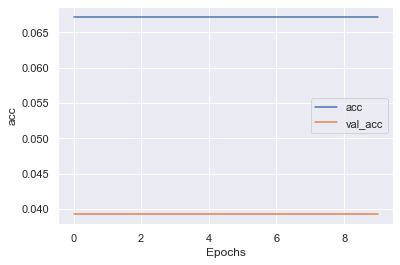

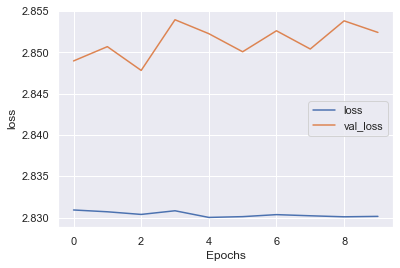

In [270]:
import matplotlib.pyplot as plt


def plot_graphs(history1, string):
  plt.plot(history2.history[string])
  plt.plot(history2.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history2, 'acc')
plot_graphs(history2, 'loss')

In [302]:
model2.save("CNN_flowers")

In [295]:
from tkinter import *
import psutil
import platform
from datetime import datetime
import os
from tkinter import messagebox

In [299]:
def read_data():
    test_image = cv2.imread("Prediction - Flower.jpg",cv2.IMREAD_COLOR)
    test_image = cv2.resize(image, (224, 224),
               interpolation = cv2.INTER_NEAREST)
    l6=Label(root,text='Image loaded',fg='light blue',bg='black' )
    l6.grid(row=8,column= 50)
    return test_image


In [300]:
def classification():
    from tensorflow import keras
    model = keras.models.load_model('CNN_flowers')
    predcition=model.predict(test_image)
    print(prediction)
    l7=Label(root,text=str(prediction),fg='light blue',bg='black' )
    l7.grid(row=14,column= 50)

In [301]:
root=Tk()
root.configure(background='light blue')
root.title("Image Classifier")
root.geometry("1000x1000")

headlabel = Label(root, text = 'Image Classifier', fg = 'light blue', bg = "black" ,justify="center",height="2")
headlabel.grid(row=2,column=50)

label1=Label(root,text="",bg='light blue')
label113=Label(root,text="Data name:Part- 1,2&3 - Signal.csv ", fg = 'light blue', bg = "black" ,justify="center",height="2")
label2=Label(root,text="" ,bg='light blue')
label3=Label(root,text="" ,bg='light blue')


label1.grid(row=3,column=1)
label113.grid(row=4,column=50)
label2.grid(row=10,column=2)
label3.grid(row=20,column=2)

button1 = Button(root, text = "Read Data", bg = "white", 
					fg = "black", command = read_data) 

button2 = Button(root, text = "Run regression", bg = "white", 
					fg = "black", command = classification)



button1.grid(row = 6, column = 2)
button2.grid(row = 12, column = 2)


root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "J:\Anaconda\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-299-f9ec6322ab02>", line 3, in read_data
    test_image = cv2.resize(image, (224, 224),
NameError: name 'image' is not defined
Exception in Tkinter callback
Traceback (most recent call last):
  File "J:\Anaconda\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-300-a04ecd2d9fad>", line 4, in classification
    predcition=model.predict(test_image)
  File "J:\Anaconda\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 1013, in predict
    use_multiprocessing=use_multiprocessing)
  File "J:\Anaconda\lib\site-packages\tensorflow_core\python\keras\engine\training_arrays.py", line 721, in predict
    x, check_steps=True, steps_name='steps', steps=steps)
  File "J:\Anaconda\lib\site-packages\tensorflow_core\python\keras\engine\training.py",

### Transfer Learning

In [275]:
# use vgg16 pre-trained model with trainable densely connected output layer

from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all the layers except for the last layer: 
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

58892288/58889256 [==============================] - 12s 0us/step


In [276]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model3 = models.Sequential()
 
# Add the vgg convolutional base model
model3.add(vgg_conv)
 
# Add new layers
model3.add(layers.Flatten())
model3.add(layers.Dense(1024, activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(17, activation='softmax'))
model3.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 17)                17425     
Total params: 40,423,249
Trainable params: 32,787,985
Non-trainable params: 7,635,264
_________________________________________________________________


In [280]:
model3.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-4), # learning rate should be small so previously learned weights don't vanish
              metrics=['acc', 'top_k_categorical_accuracy'])

In [303]:
#history3 = model3.fit_generator(
      #datagen.flow(X_train, y_train, batch_size=64),validation_data=(X_test,y_test),
      #epochs=10,
      #verbose=0)

# Part- 5

#### The image classifer can be mainted by adding more images and classes.